# Creating a random pokemon name generator

In [91]:
words = open('pokemon_names.txt','r').read().splitlines()

In [92]:
words[:10]

['Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie']

## Bi-gram model

In [93]:
# Cleaning the data

# Turning the words into lowercase
words = [w.lower() for w in words]

# Removing symbols, punctuations and numbers for the names
words = [word for word in words if not any(letter in word for letter in ['.','-',' ',"’",'♀','♂',"|"])]
words.remove('porygon2')
words = ['flabebe' if word == 'flabébé' else word for word in words]

In [94]:
list(words)

['bulbasaur',
 'ivysaur',
 'venusaur',
 'charmander',
 'charmeleon',
 'charizard',
 'squirtle',
 'wartortle',
 'blastoise',
 'caterpie',
 'metapod',
 'butterfree',
 'weedle',
 'kakuna',
 'beedrill',
 'pidgey',
 'pidgeotto',
 'pidgeot',
 'rattata',
 'raticate',
 'spearow',
 'fearow',
 'ekans',
 'arbok',
 'pikachu',
 'raichu',
 'sandshrew',
 'sandslash',
 'nidorina',
 'nidoqueen',
 'nidorino',
 'nidoking',
 'clefairy',
 'clefable',
 'vulpix',
 'ninetales',
 'jigglypuff',
 'wigglytuff',
 'zubat',
 'golbat',
 'oddish',
 'gloom',
 'vileplume',
 'paras',
 'parasect',
 'venonat',
 'venomoth',
 'diglett',
 'dugtrio',
 'meowth',
 'persian',
 'psyduck',
 'golduck',
 'mankey',
 'primeape',
 'growlithe',
 'arcanine',
 'poliwag',
 'poliwhirl',
 'poliwrath',
 'abra',
 'kadabra',
 'alakazam',
 'machop',
 'machoke',
 'machamp',
 'bellsprout',
 'weepinbell',
 'victreebel',
 'tentacool',
 'tentacruel',
 'geodude',
 'graveler',
 'golem',
 'ponyta',
 'rapidash',
 'slowpoke',
 'slowbro',
 'magnemite',
 'ma

In [95]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1
b

{('.', 'b'): 45,
 ('b', 'u'): 22,
 ('u', 'l'): 12,
 ('l', 'b'): 5,
 ('b', 'a'): 20,
 ('a', 's'): 34,
 ('s', 'a'): 21,
 ('a', 'u'): 13,
 ('u', 'r'): 43,
 ('r', '.'): 67,
 ('.', 'i'): 6,
 ('i', 'v'): 6,
 ('v', 'y'): 3,
 ('y', 's'): 4,
 ('.', 'v'): 23,
 ('v', 'e'): 14,
 ('e', 'n'): 32,
 ('n', 'u'): 6,
 ('u', 's'): 24,
 ('.', 'c'): 63,
 ('c', 'h'): 46,
 ('h', 'a'): 32,
 ('a', 'r'): 99,
 ('r', 'm'): 10,
 ('m', 'a'): 53,
 ('a', 'n'): 82,
 ('n', 'd'): 17,
 ('d', 'e'): 32,
 ('e', 'r'): 57,
 ('m', 'e'): 29,
 ('e', 'l'): 60,
 ('l', 'e'): 75,
 ('e', 'o'): 25,
 ('o', 'n'): 76,
 ('n', '.'): 78,
 ('r', 'i'): 49,
 ('i', 'z'): 4,
 ('z', 'a'): 7,
 ('r', 'd'): 11,
 ('d', '.'): 21,
 ('.', 's'): 112,
 ('s', 'q'): 2,
 ('q', 'u'): 11,
 ('u', 'i'): 7,
 ('i', 'r'): 23,
 ('r', 't'): 13,
 ('t', 'l'): 8,
 ('e', '.'): 119,
 ('.', 'w'): 23,
 ('w', 'a'): 14,
 ('t', 'o'): 42,
 ('o', 'r'): 59,
 ('b', 'l'): 14,
 ('l', 'a'): 53,
 ('s', 't'): 31,
 ('o', 'i'): 8,
 ('i', 's'): 35,
 ('s', 'e'): 29,
 ('c', 'a'): 26,
 ('a', 

In [96]:
chars = sorted(list(set(''.join(words))))

In [97]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [98]:
import torch

In [99]:
N = torch.zeros((27,27),dtype=torch.int32)

In [100]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1


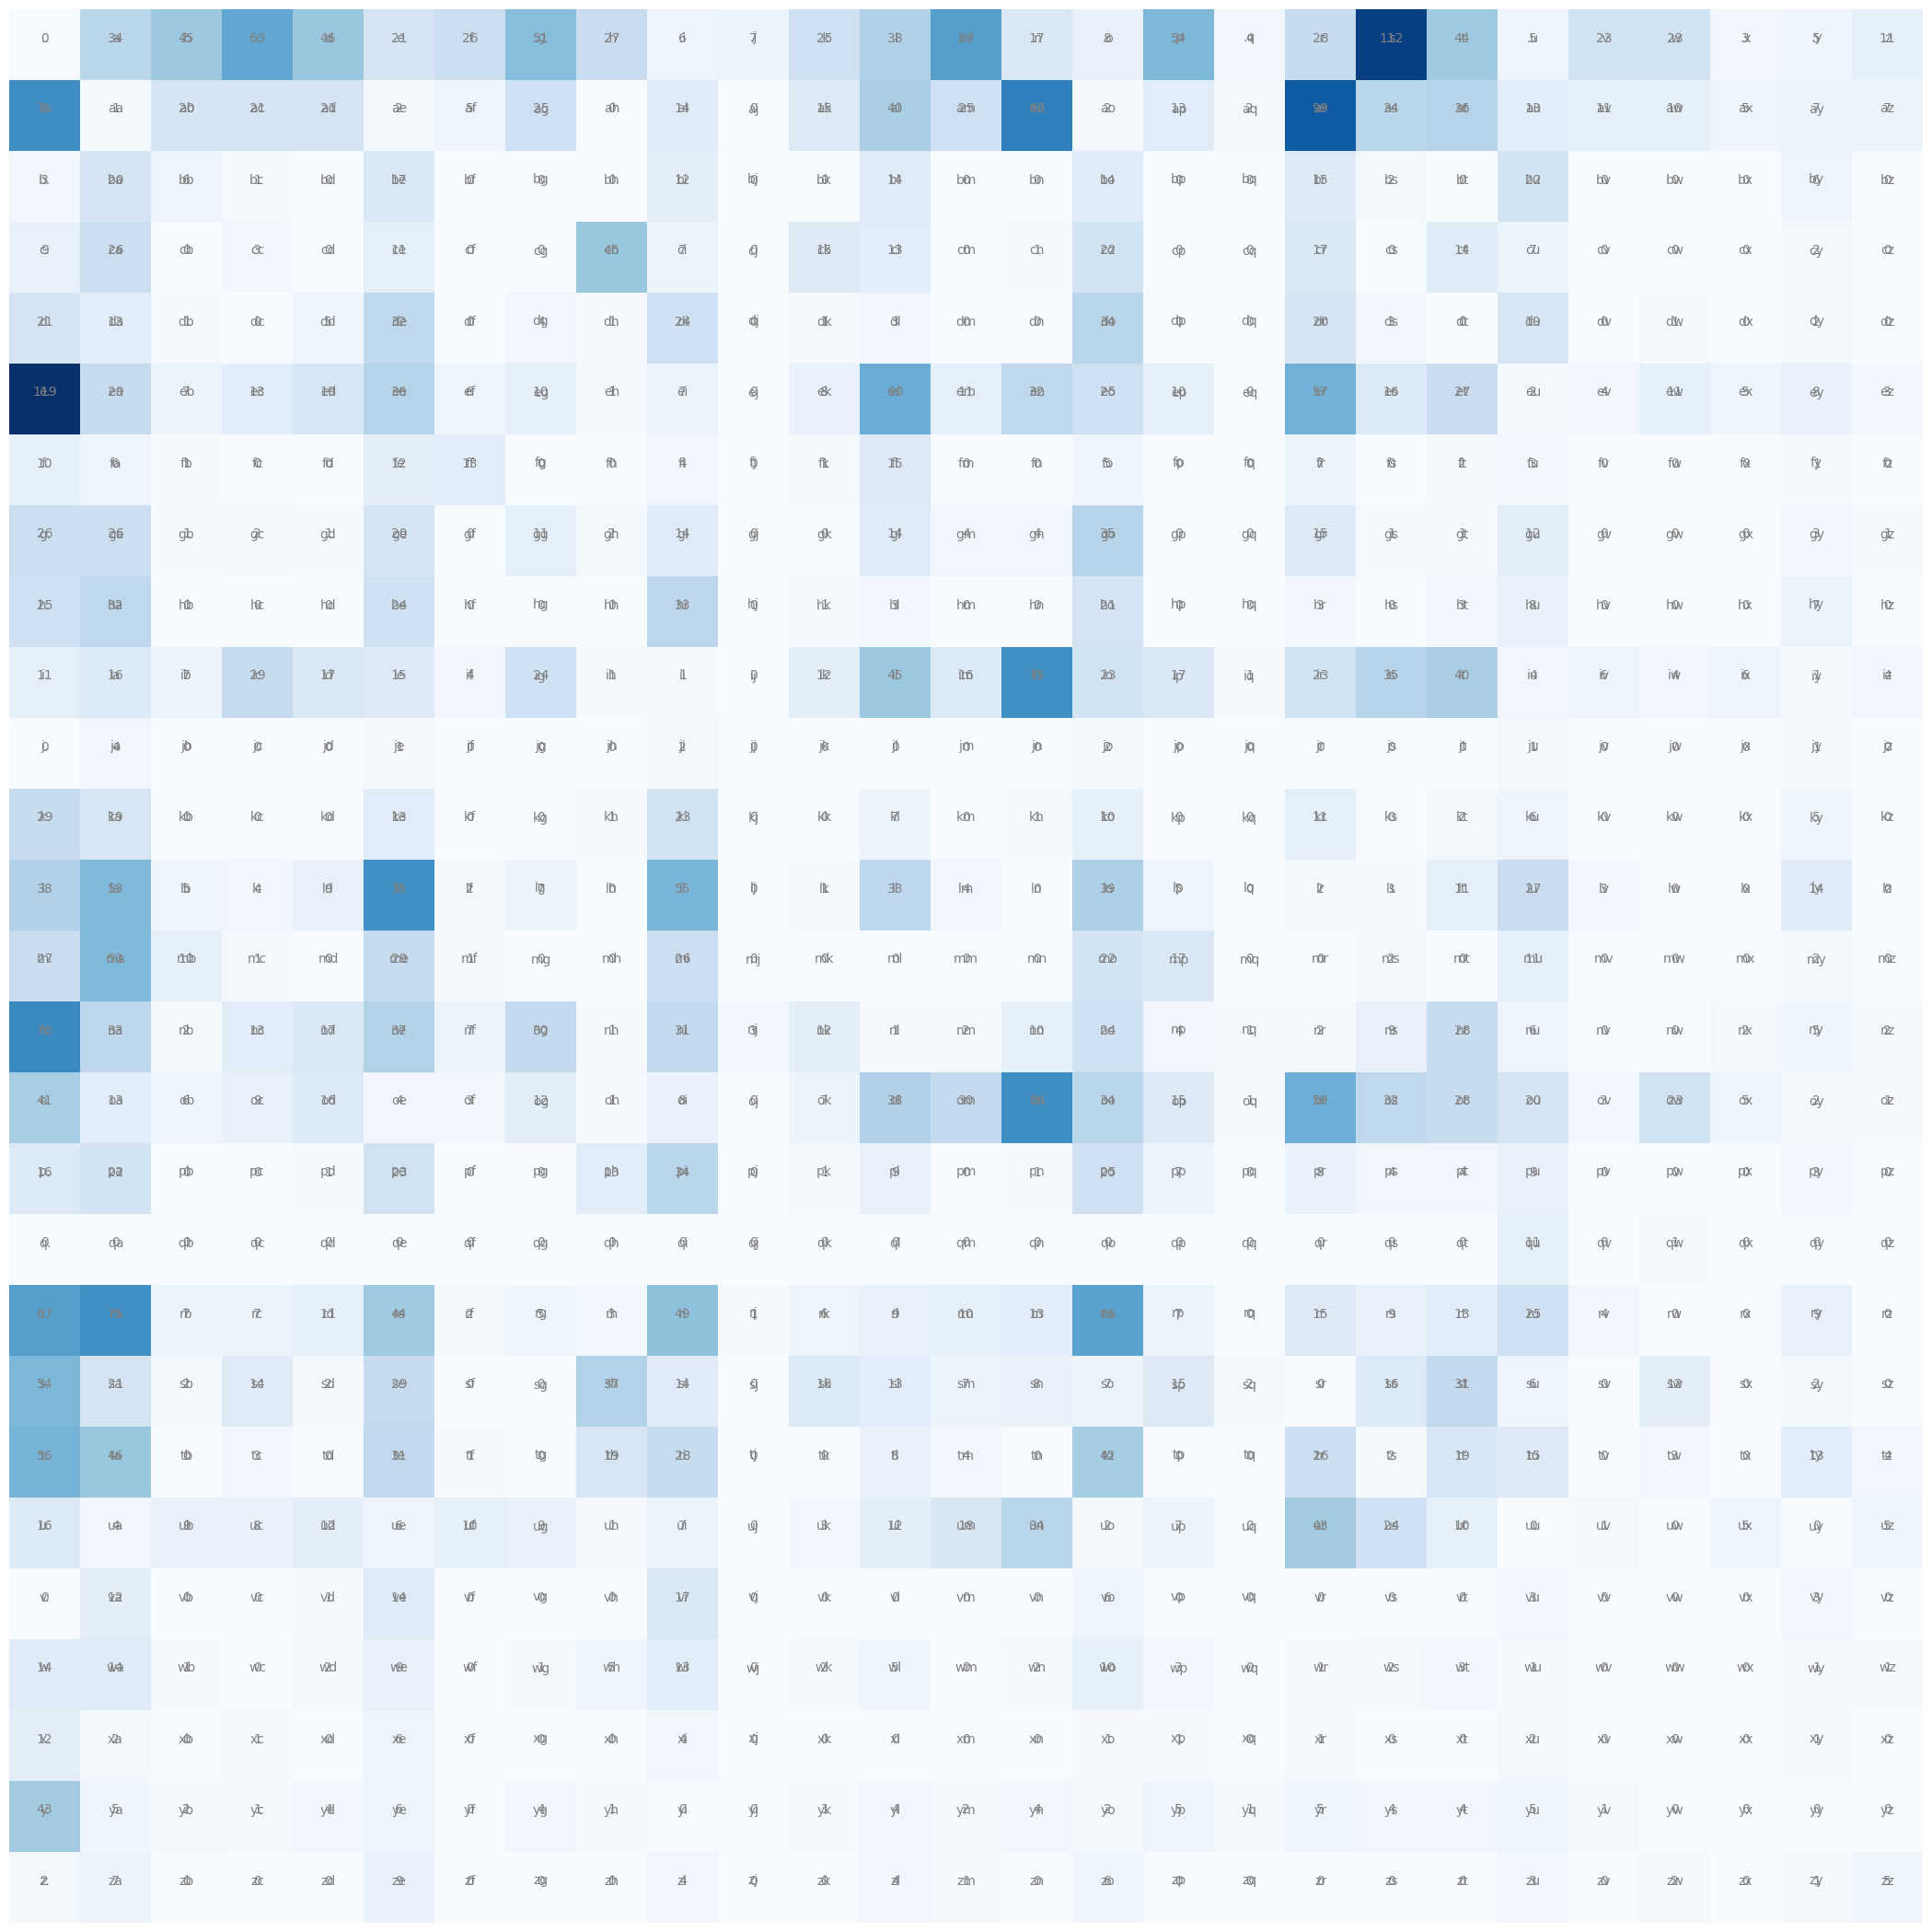

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(27,27))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
        plt.text(j,i,N[i,j].item(),ha='center',va='bottom',color='gray')
plt.axis('off');

In [113]:
N[0]

tensor([  0,  34,  45,  63,  46,  21,  26,  51,  27,   6,   7,  25,  38,  67,
         17,   8,  54,   4,  28, 112,  44,   5,  23,  23,   3,   5,  11],
       dtype=torch.int32)

In [123]:
P = N.float()
P /= P.sum(1,keepdim=True)
P.shape

torch.Size([27, 27])

In [125]:
g = torch.Generator().manual_seed(230296)

for i in range(5):

    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

goa.
sordklerfkrufbbohadainggoranl.
xin.
s.
porus.
